# Machine Learning Test 2

### By Ciniso Msibi

### may22/comp/1423x

In [240]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [241]:
df = pd.read_csv("mltest.csv")
df.head()

,Age,Job,House,Credit,Loan Approived
0,Young,False,No,Fair,No
1,Young,False,No,Good,No
2,Young,True,No,Good,Yes
3,Young,True,Yes,Fair,Yes
4,Young,False,No,Fair,No


In [242]:
df.shape

(15, 5)

In [243]:
X =df[["Age","Job","House", "Credit"]].values
X[0:5]

array([['Young', False, 'No', 'Fair'],
       ['Young', False, 'No', 'Good'],
       ['Young', True, 'No', 'Good'],
       ['Young', True, 'Yes', 'Fair'],
       ['Young', False, 'No', 'Fair']], dtype=object)

In [244]:
df.rename(columns = {'Loan Approived':'Loan_Approved'}, inplace = True)

In [245]:
y =df["Loan_Approved"]
y[0:5]

0     No
1     No
2    Yes
3    Yes
4     No
Name: Loan_Approved, dtype: object

In [246]:
from sklearn.preprocessing import LabelEncoder
le_job = LabelEncoder()
New_job = le_job.fit_transform(df['Job'])
le_house = LabelEncoder()
New_house = le_house.fit_transform(df['House'])
le_Credit =LabelEncoder()
New_Credit = le_Credit.fit_transform(df['Credit'])
le_Age =LabelEncoder()
New_Age = le_Age.fit_transform(df['Age'])
New_job

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [247]:
df.drop("Age", axis=1, inplace=True)
df["Age"] = New_Age
df.drop("Job", axis=1, inplace=True)
df["Job"] = New_job
df.drop("House", axis=1, inplace=True)
df["House"] = New_house
df.drop("Credit", axis=1, inplace=True)
df["Credit"] = New_Credit

In [248]:
X =df[["Age","Job","House", "Credit"]].values
X[0:5]

array([[2, 0, 0, 1],
       [2, 0, 0, 2],
       [2, 1, 0, 2],
       [2, 1, 1, 1],
       [2, 0, 0, 1]], dtype=int64)

### Decision Tree Modelling

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y,test_size=0.3, random_state=3)

In [251]:
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LoanTree 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [252]:
LoanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [253]:
import six
import sys
sys.modules['externals.six'] = six
#from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt
from six import StringIO

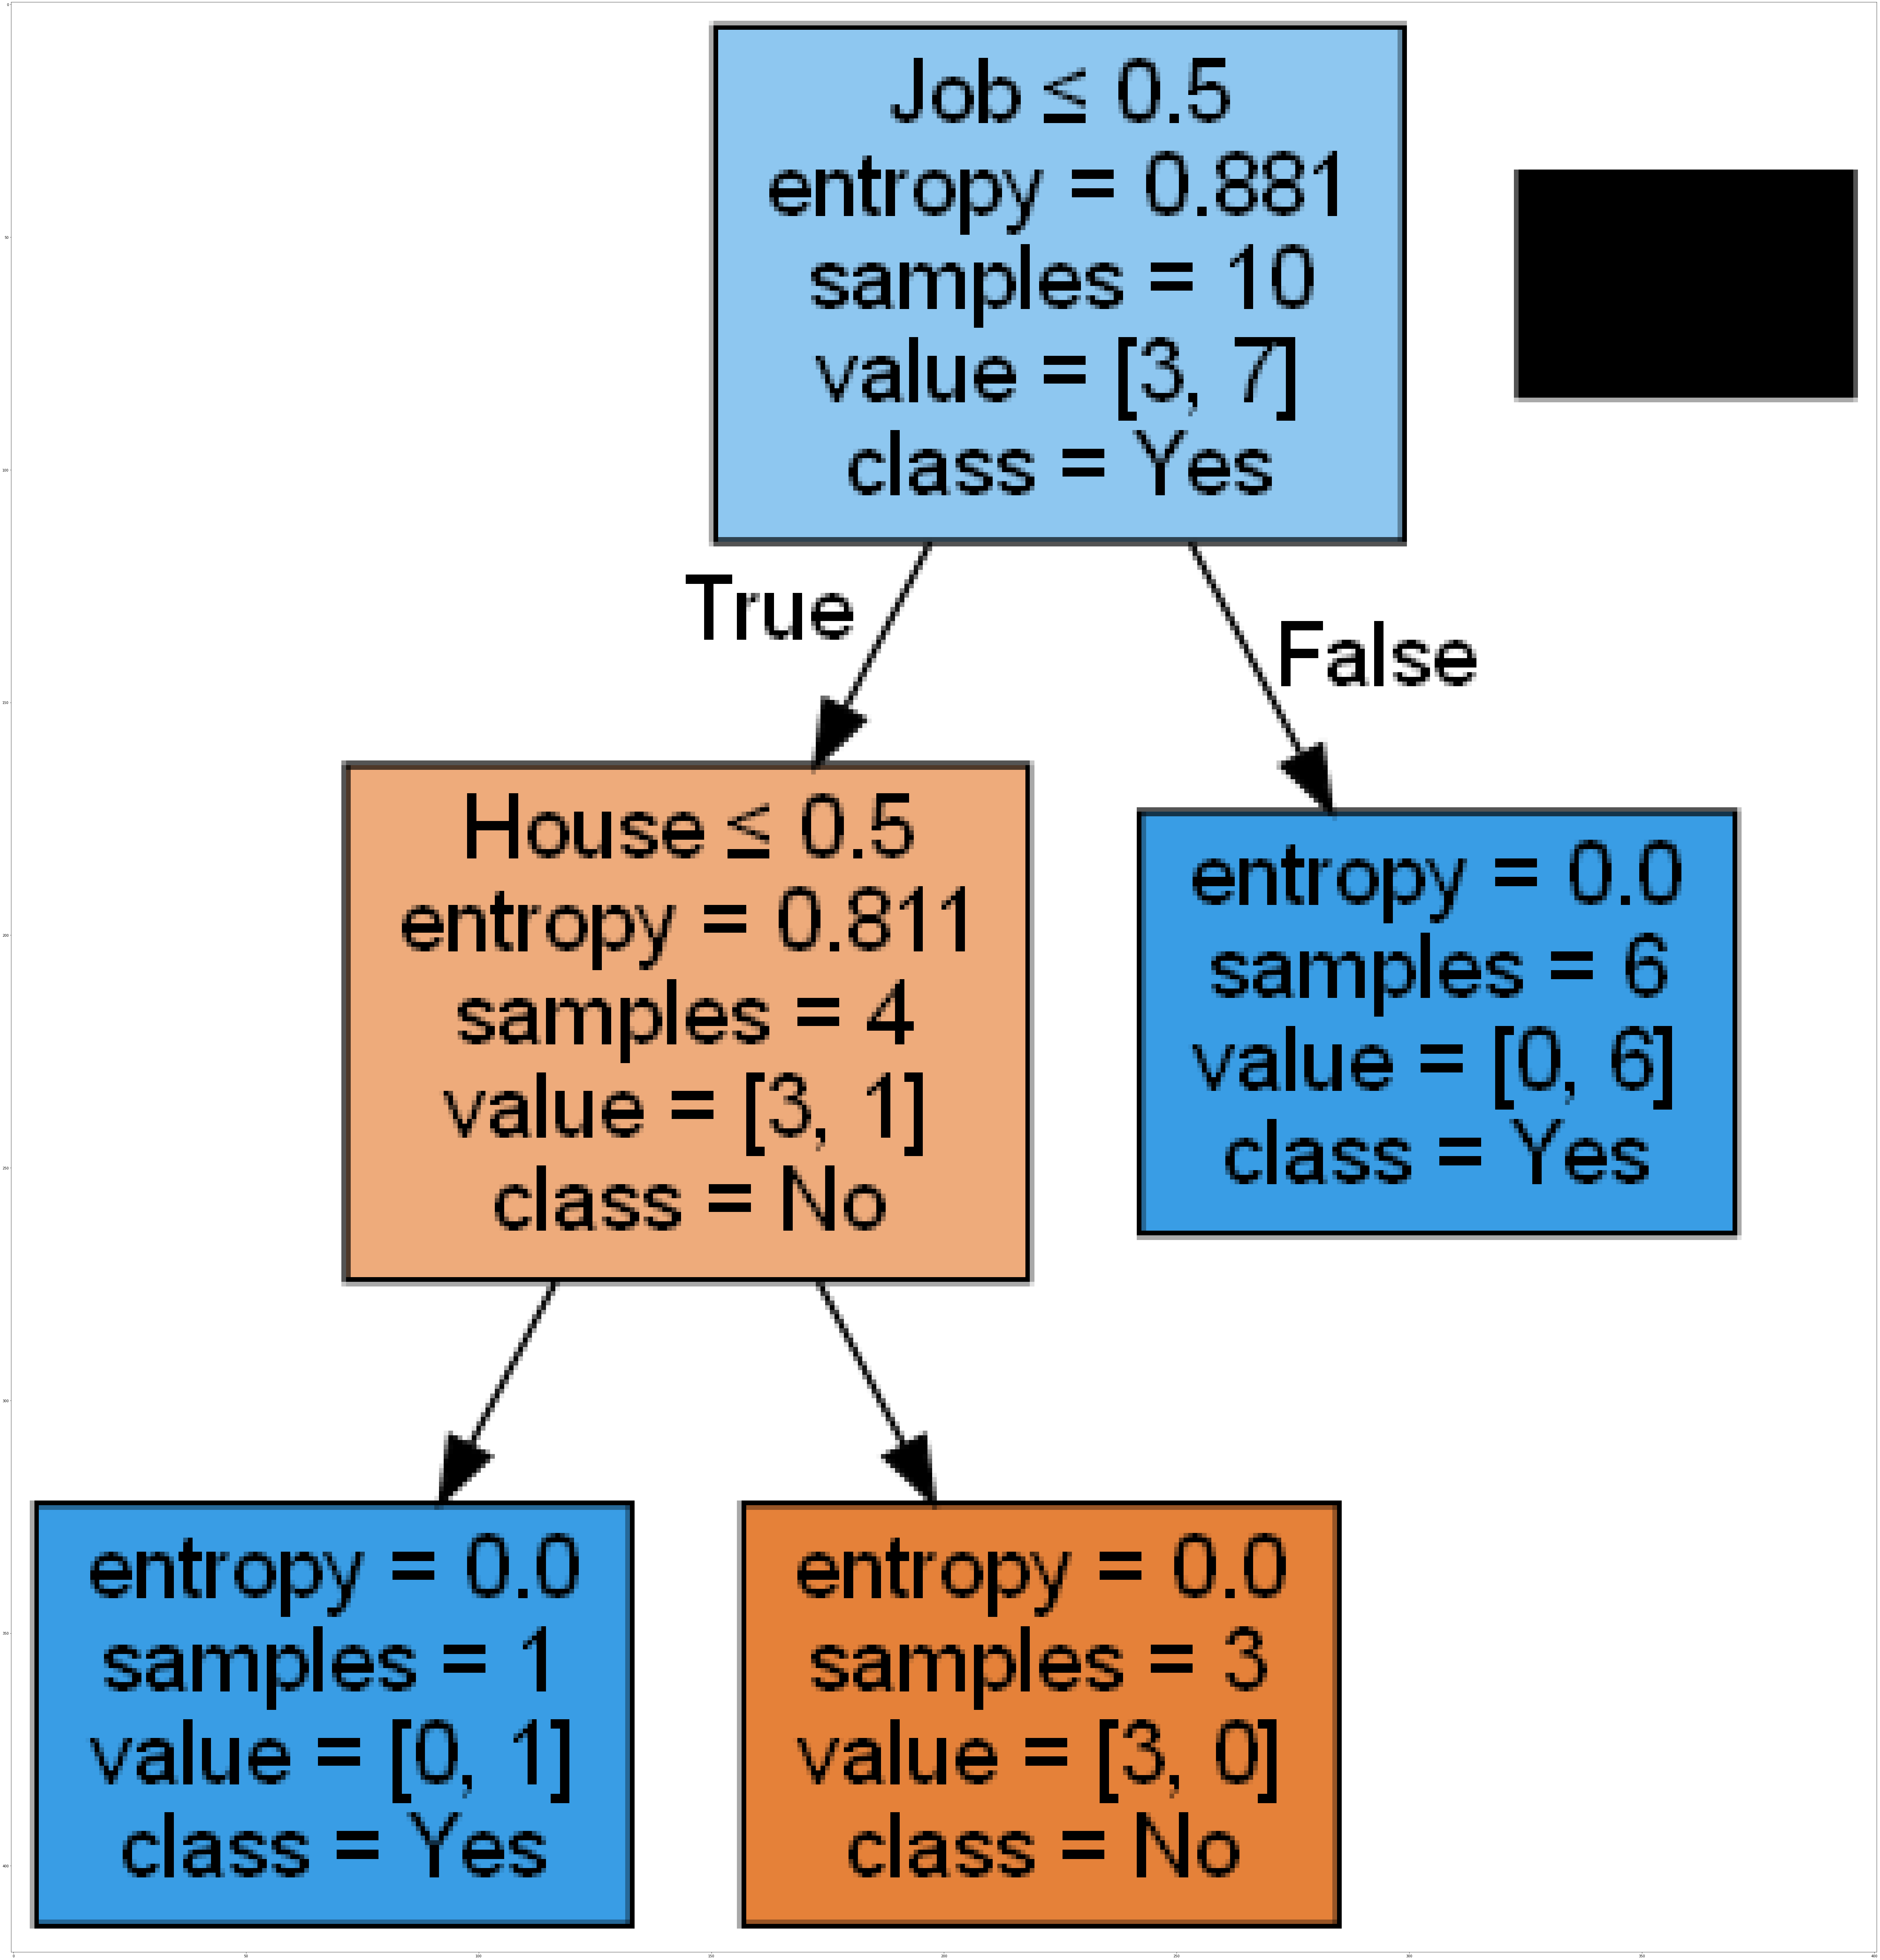

In [254]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:4]
targetNames = df["Loan_Approved"].unique().tolist()
out=tree.export_graphviz(LoanTree,feature_names=featureNames,out_file=dot_data, class_names= np.unique(y_trainset), filled=True,special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [255]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [256]:
yhat_tree=LoanTree.predict(X)
yhat_tree_loss=LoanTree.predict_proba(X_testset)
tree_jacc_test=metrics.jaccard_score(y, yhat_tree, average='micro')
tree_f1_test=metrics.f1_score(y, yhat_tree, average ='macro')
tree_log_test=metrics.log_loss(y_testset, yhat_tree_loss)
tree_cnf_matrix = confusion_matrix(y, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test , " the Log Loss is ",tree_log_test)
print(classification_report(y, yhat_tree))
tree_cnf_matrix

Accuracy is  0.7647058823529411  F1 is 0.8660714285714286  the Log Loss is  13.815510557964274
              precision    recall  f1-score   support

          No       0.75      1.00      0.86         6
         Yes       1.00      0.78      0.88         9

    accuracy                           0.87        15
   macro avg       0.88      0.89      0.87        15
weighted avg       0.90      0.87      0.87        15



array([[6, 0],
       [2, 7]], dtype=int64)

### Model Testing

In [257]:
#Predicting a new loan applicant with Age=young, Job=False, House=No, Credit=Good

y_new = LoanTree.predict([[2,0,0,2]])
y_new

array(['No'], dtype=object)

## The answer to the given problem is No, the loan will not be approved